In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [111]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline
iris = pd.read_csv("iris.csv")
random_subset = iris.sample(n=10)
print(random_subset.head())
iris.head(5)

    Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
39                   5.1                  3.4                   1.5   
84                   5.4                  3.0                   4.5   
66                   5.6                  3.0                   4.5   
90                   5.5                  2.6                   4.4   
79                   5.7                  2.6                   3.5   

    Petal width (in cm)            Class  
39                  0.2      Iris-setosa  
84                  1.5  Iris-versicolor  
66                  1.5  Iris-versicolor  
90                  1.2  Iris-versicolor  
79                  1.0  Iris-versicolor  


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [112]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean',
axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
### No missing values in dataset

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [113]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
label_encoder = LabelEncoder()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [115]:
corr_mat= iris.corr()
print(corr_mat)
## there are no variables less than -0.1 to 0.1. Hence, variables are not dropped from data set.

                      Sepal Length (in cm)  Sepal Width in (cm)  \
Sepal Length (in cm)              1.000000            -0.109369   
Sepal Width in (cm)              -0.109369             1.000000   
Petal length (in cm)              0.871754            -0.420516   
Petal width (in cm)               0.817954            -0.356544   
Class_new                         0.782561            -0.419446   

                      Petal length (in cm)  Petal width (in cm)  Class_new  
Sepal Length (in cm)              0.871754             0.817954   0.782561  
Sepal Width in (cm)              -0.420516            -0.356544  -0.419446  
Petal length (in cm)              1.000000             0.962757   0.949043  
Petal width (in cm)               0.962757             1.000000   0.956464  
Class_new                         0.949043             0.956464   1.000000  


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [116]:
values_less=corr_mat[corr_mat['Class_new']<=0.1]
value=values_less.index.values
iris.drop(value,axis=1,inplace=True)
iris.head()



,Sepal Length (in cm),Petal length (in cm),Petal width (in cm),Class_new
0,5.1,1.4,0.2,0
1,4.9,1.4,0.2,0
2,4.7,1.3,0.2,0
3,4.6,1.5,0.2,0
4,5.0,1.4,0.2,0


## Question 6

*Plot the scatter matrix for all the variables.*

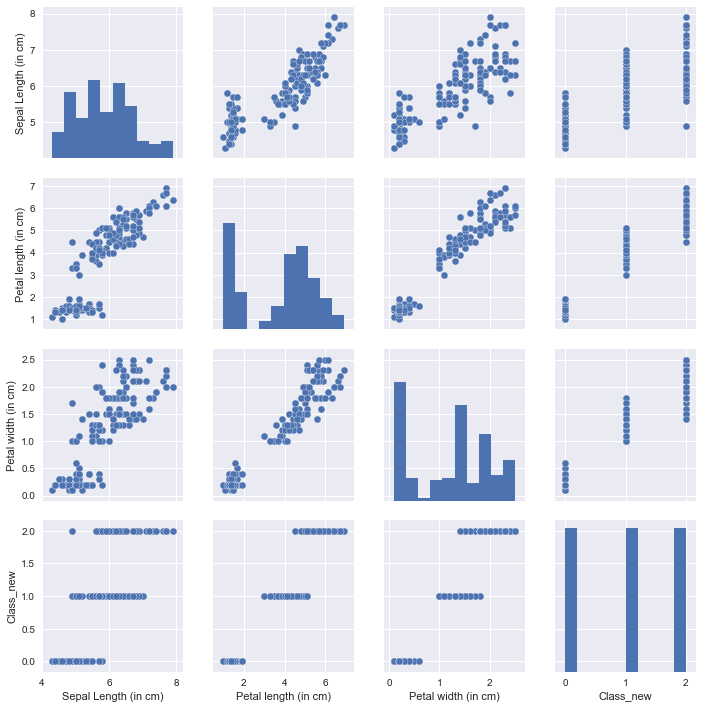

In [117]:
import seaborn as sns
sns.pairplot(iris)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [120]:
from sklearn.model_selection import train_test_split
independent= iris.iloc[:,0:-1]
## scaling all variables
#independent = independent.apply(zscore)

dependent= iris.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2,random_state=5)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [121]:
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.90000000000000002

In [122]:
from sklearn.metrics import accuracy_score
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.93333333333333335

In [123]:
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=9)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.96666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [124]:
from sklearn.model_selection import cross_val_score
neighbors=list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.96665740483467633,
 0.96665740483467633,
 0.96665740483467633,
 0.95026396221172549,
 0.9584606835232008,
 0.95026396221172549,
 0.92567379827729923,
 0.93387051958877465,
 0.92567379827729923,
 0.91747707696582381]

In [128]:
MSE = [1 - x for x in cv_scores]
for i in range(len(neighbors)):
    print ('with K',neighbors[i],':', MSE[i])

print (' ')
print ('Model with lowest MSE:',min(MSE))

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

with K 1 : 0.0333425951653
with K 3 : 0.0333425951653
with K 5 : 0.0333425951653
with K 7 : 0.0497360377883
with K 9 : 0.0415393164768
with K 11 : 0.0497360377883
with K 13 : 0.0743262017227
with K 15 : 0.0661294804112
with K 17 : 0.0743262017227
with K 19 : 0.0825229230342
 
Model with lowest MSE: 0.0333425951653
The optimal number of neighbors is 1


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

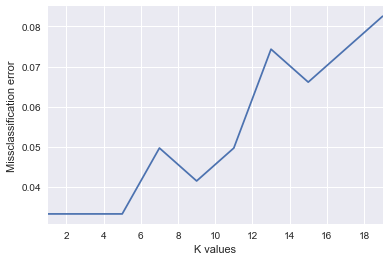

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(neighbors, MSE)
plt.xlim(1,19);
plt.xlabel('K values')
plt.ylabel('Missclassification error');

# Naive Bayes with Iris Data

In [126]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [159]:
iris = pd.read_csv("iris.csv")


In [160]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(iris['Class'].values)
print(integer_encoded)
iris['Class_new']=integer_encoded
iris.head()
iris.drop('Class',axis=1,inplace=True)
iris.head()
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [161]:
#Check the dataset
print(y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

   Class_new  count      prop
0          2     50  0.333333
1          1     50  0.333333
2          0     50  0.333333


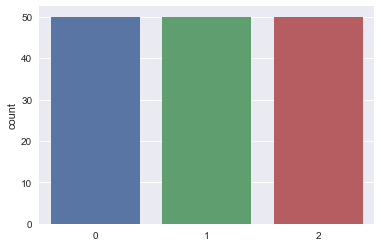

In [164]:
## Target Variable Frequency Distribution
freq = iris['Class_new'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

import seaborn as sns
sns.countplot(y)

In [0]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [165]:
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class_new
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class_new,0.782561,-0.419446,0.949043,0.956464,1.000000


In [166]:
def correlation(iris, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = iris.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in iris.columns:
                    del iris[colname] # deleting the column from the dataset

    print(iris)
    

### Split data in Training and test set in 80:20.

In [167]:
from sklearn.model_selection import train_test_split
independent= iris.iloc[:,0:-1]
## scaling all variables
#independent = independent.apply(zscore)

dependent= iris.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2,random_state=5)


### Question 13 
Do Feature Scaling 

In [0]:
# Use StandardScaler or similar methods

In [178]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train

C:\Users\Ravichandra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Ravichandra\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([[-0.88140924,  0.72750289, -1.23547394, -1.26527703],
       [-0.40389633, -1.69139841,  0.17434798,  0.16834158],
       [-0.16513988, -1.03169805, -0.10761641, -0.22264531],
       [-0.52327456,  1.38720324, -1.23547394, -1.26527703],
       [ 1.38677706,  0.28770265,  0.56909811,  0.29867054],
       [-1.00078746,  0.50760277, -1.29186681, -1.26527703],
       [-1.00078746,  0.94740301, -1.17908106, -0.74396117],
       [ 2.22242464, -0.15209758,  1.35859839,  1.47163122],
       [-1.00078746,  0.94740301, -1.34825969, -1.13494806],
       [ 0.6705077 ,  0.28770265,  0.90745537,  1.47163122],
       [-0.04576165, -0.81179793,  0.79466962,  0.95031536],
       [-0.28451811, -1.25159817,  0.1179551 , -0.09231635],
       [-0.88140924,  0.94740301, -1.29186681, -1.13494806],
       [-0.88140924,  1.60710336, -1.17908106, -1.26527703],
       [ 0.78988593, -0.59189782,  0.51270524,  0.42899951],
       [ 0.43175125, -0.59189782,  0.62549099,  0.8199864 ],
       [ 0.07361657, -0.

### Question 14 
Train and Fit NaiveBayes Model

In [169]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB()
NB.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [172]:
#Predict
y_pred=NB.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [173]:
# show Confusi# show Confusion Matrix
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [11,  0,  0],
       [11,  0,  0]])

In [174]:
# show accuracy
accuracy_score(y_test, y_pred)

0.26666666666666666

In [0]:
#Show precision and Recall metrics

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779